In [1]:
%pylab inline

from ten import String

def to_row(string):
    return hex_to_bin(string.hex)

def hex_to_bin(hex_):
    scale = 16 ## equals to hexadecimal
    num_of_bits = 8
    s = ''
    for char in hex_:
        s += '{0:04d}'.format(int(bin(int(char, scale))[2:]))
    return s

def get_grid(string):
    grid = []
    for i in range(128):
        print(i, end='...\t')
        string_ = string + '-' + str(i)
        data = String(list(range(256)), string_)
        row = to_row(data)
        bools = [c == '1' for c in row]
        grid.append(bools)
    return grid

def get_tot(grid):
    tot = 0
    for row in grid:
                tot += sum(row)
    return tot

test_grid = get_grid('flqrgnkx')
assert get_tot(test_grid) == 8108

Populating the interactive namespace from numpy and matplotlib
0...	1...	2...	3...	4...	5...	6...	7...	8...	9...	10...	11...	12...	13...	14...	15...	16...	17...	18...	19...	20...	21...	22...	23...	24...	25...	26...	27...	28...	29...	30...	31...	32...	33...	34...	35...	36...	37...	38...	39...	40...	41...	42...	43...	44...	45...	46...	47...	48...	49...	50...	51...	52...	53...	54...	55...	56...	57...	58...	59...	60...	61...	62...	63...	64...	65...	66...	67...	68...	69...	70...	71...	72...	73...	74...	75...	76...	77...	78...	79...	80...	81...	82...	83...	84...	85...	86...	87...	88...	89...	90...	91...	92...	93...	94...	95...	96...	97...	98...	99...	100...	101...	102...	103...	104...	105...	106...	107...	108...	109...	110...	111...	112...	113...	114...	115...	116...	117...	118...	119...	120...	121...	122...	123...	124...	125...	126...	127...	

In [2]:
grid = get_grid('ljoxqyyw')
print(get_tot(grid))

0...	1...	2...	3...	4...	5...	6...	7...	8...	9...	10...	11...	12...	13...	14...	15...	16...	17...	18...	19...	20...	21...	22...	23...	24...	25...	26...	27...	28...	29...	30...	31...	32...	33...	34...	35...	36...	37...	38...	39...	40...	41...	42...	43...	44...	45...	46...	47...	48...	49...	50...	51...	52...	53...	54...	55...	56...	57...	58...	59...	60...	61...	62...	63...	64...	65...	66...	67...	68...	69...	70...	71...	72...	73...	74...	75...	76...	77...	78...	79...	80...	81...	82...	83...	84...	85...	86...	87...	88...	89...	90...	91...	92...	93...	94...	95...	96...	97...	98...	99...	100...	101...	102...	103...	104...	105...	106...	107...	108...	109...	110...	111...	112...	113...	114...	115...	116...	117...	118...	119...	120...	121...	122...	123...	124...	125...	126...	127...	8316


In [3]:
import numpy as np

# define 'neighbors' 
neighbors = np.array([(0, 1), (1, 0), (0, -1), (-1, 0)])

def expand(g, square, n):
    '''
    Expand and label a connected region 
    '''
    # Bounds check
    for s in square: 
        if s >= g.shape[0] or s < 0:
            return False

    # Get the value
    val = g[square[0], square[1]]

    # Leave if the value is not 0
    if val != 0:
        return False

    # Expand into surrounding squares
    g[square] = n
    for neighbor in neighbors:
        coord = (square[0] + neighbor[0], square[1] + neighbor[1])
        expand(g, coord, n)
    return True

def label_connected_regions(grid):
    # Create a new grid with 0's for valid squares and nan's for invalid squares
    g = np.array(grid).astype(float)
    g[g==0] = float('nan')
    g[g==1] = 0
    
    # Expand every square on the grid
    n = 1
    for i in range(g.shape[0]):
        for j in range(g.shape[1]):
            if expand(g, (i, j), n):
                n += 1

    # Get the max value
    return g

def get_number_of_regions(grid):
    labelled = label_connected_regions(grid)
    return np.nanmax(labelled)

def print_label_grid(g):
    for i in range(15):
        for j in range(15):
            print('{0:03.0f}'.format(g[i, j]), end='  ')
        print('\n')

assert get_number_of_regions(test_grid) == 1242

In [4]:
get_number_of_regions(grid)

1074.0

In [5]:
labels = label_connected_regions(grid)

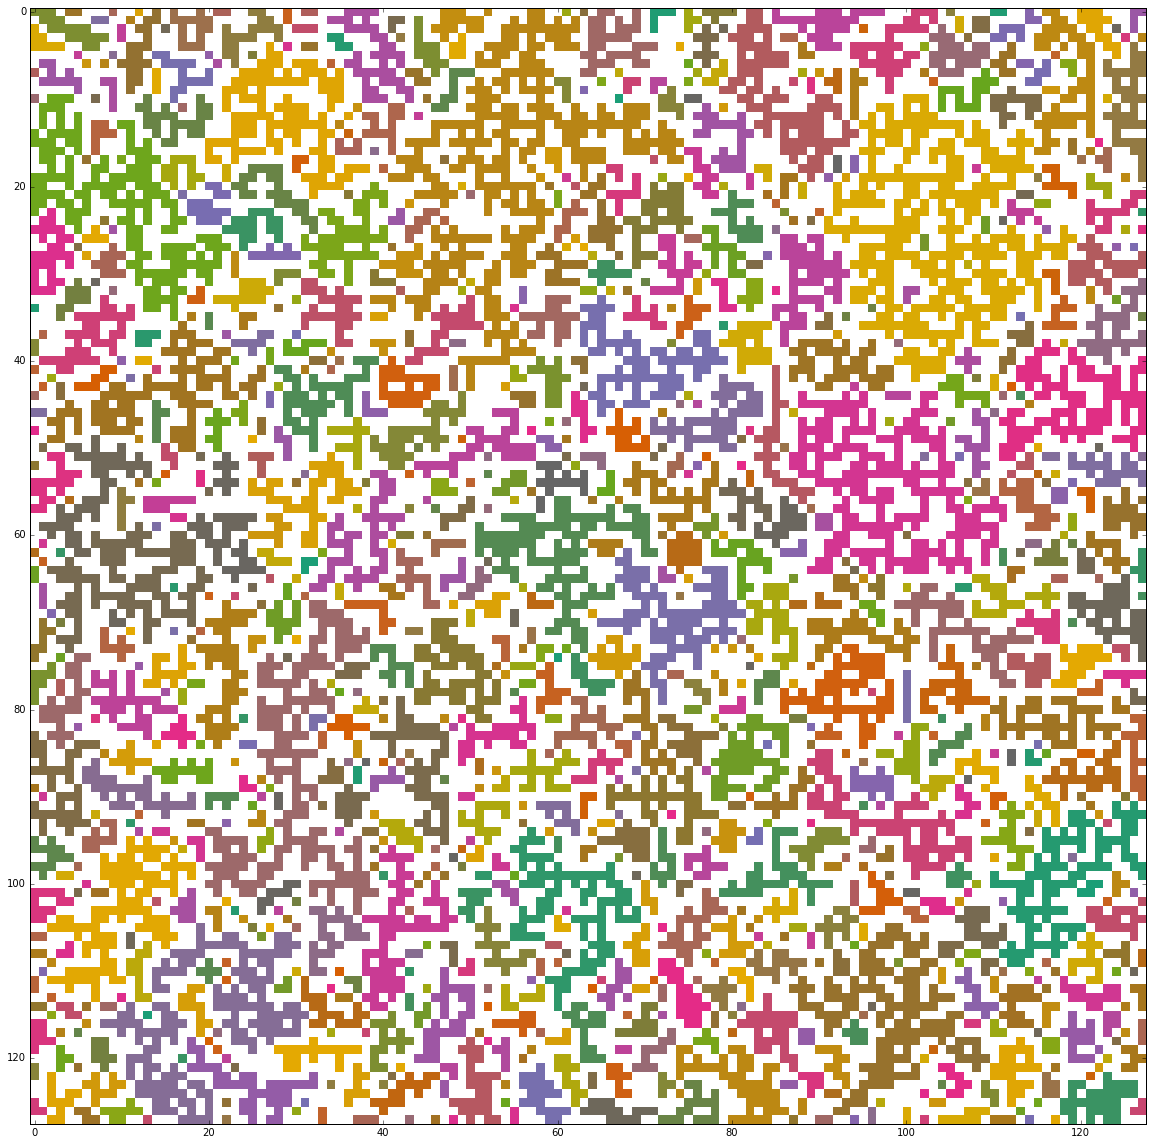

In [26]:
# shuffle all the data 
n = labels.shape[0]
data = labels[:n, :n]

plt.figure(figsize=(20, 20))

# Change all the indices 
data_shuffled = np.zeros_like(data) * np.nan
opts = np.unique(data[np.isnan(data)==False])
shuff = opts.copy()
np.random.shuffle(shuff)

for a, b in zip(opts, shuff):
    data_shuffled[data==a] = b

plt.imshow(data_shuffled, interpolation='nearest', cmap=plt.cm.Dark2)